# Importing the libraries

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.svm import SVC 
from sklearn import metrics
from sklearn.model_selection import train_test_split,ShuffleSplit
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from itertools import chain

# 1. Read the dataset to the python environment

In [2]:
df = pd.read_csv("Wine.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
df.shape

(178, 13)

In [5]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Outliers Detection

<AxesSubplot:>

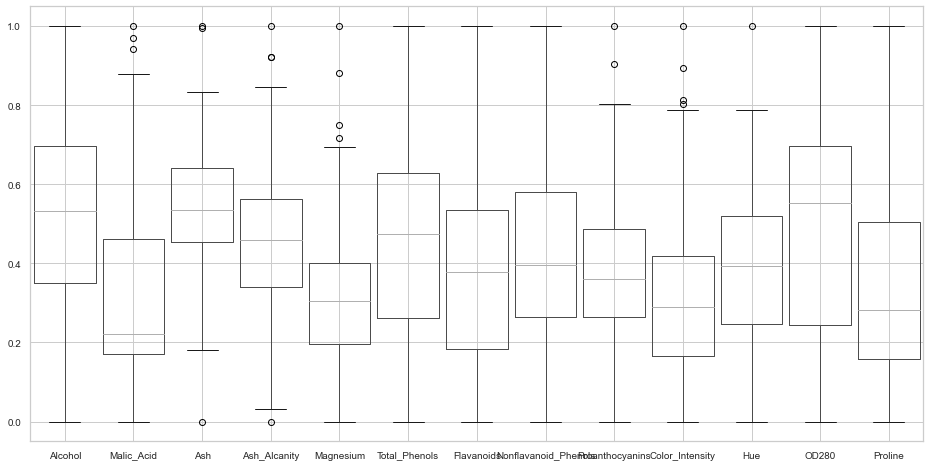

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df) 
df.loc[:,:] = scaled_values

sns.set(rc={'figure.figsize':(16,8)}, font_scale=0.9, style='whitegrid')
df.boxplot(widths = 0.9)

In [7]:
def IQR_OutlierRemoval(new_df):  
    Q1 = new_df.quantile(0.25)
    Q3 = new_df.quantile(0.75)
    IQR = Q3 - Q1

    new_df = new_df[~((new_df < (Q1 - 1.5 * IQR)) |(new_df > (Q3 + 1.5 * IQR))).any(axis=1)]

    return new_df
   

df2 = df.copy()

print(df2.shape)

(178, 13)


In [8]:
df2 = IQR_OutlierRemoval(df2) #outlier removal
df2.shape

(161, 13)

<AxesSubplot:>

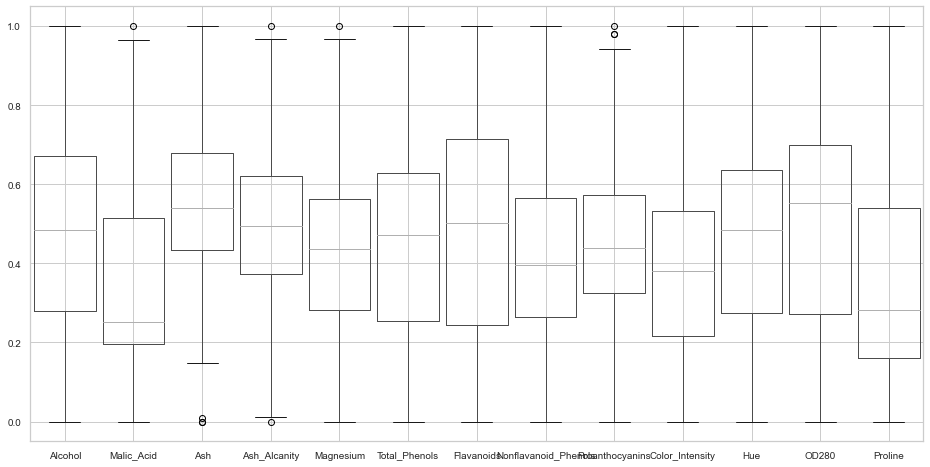

In [9]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df2) 
df2.loc[:,:] = scaled_values

sns.set(rc={'figure.figsize':(16,8)}, font_scale=0.9, style='whitegrid')
df2.boxplot(widths = 0.9)

Now the outliers are removed

In [10]:
df2.iloc[:, 0].values

array([0.8245614 , 0.52339181, 0.51169591, 0.86549708, 0.53508772,
       0.81578947, 0.87134503, 0.7748538 , 1.        , 0.71637427,
       0.78654971, 0.79239766, 0.68421053, 0.97660819, 0.86842105,
       0.64912281, 0.84502924, 0.70760234, 0.8128655 , 0.65204678,
       0.7748538 , 0.44444444, 0.67251462, 0.42105263, 0.61111111,
       0.57894737, 0.55263158, 0.71929825, 0.76315789, 0.67836257,
       0.63450292, 0.66374269, 0.6871345 , 0.61403509, 0.60526316,
       0.54678363, 0.47953216, 0.48538012, 0.82163743, 0.62865497,
       0.58479532, 0.72222222, 0.53508772, 0.47953216, 0.81871345,
       0.86842105, 0.72807018, 0.78654971, 0.73976608, 0.47953216,
       0.70760234, 0.70467836, 0.69005848, 0.68128655, 0.62865497,
       0.82163743, 0.5497076 , 0.6754386 , 0.26900585, 0.35964912,
       0.66081871, 0.28070175, 0.22222222, 0.28070175, 0.49707602,
       0.28070175, 0.56432749, 0.25730994, 0.71637427, 0.60818713,
       0.16081871, 0.07309942, 0.47368421, 0.12573099, 0.37719

In [11]:
from sklearn.model_selection import train_test_split
X, y = df2.iloc[:, 1:].values, df2.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
len(X_test), len(X_train)

(49, 112)

Normalization

In [13]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [14]:
X_train_norm[0]

array([0.10465116, 0.16393443, 0.49324324, 0.29032258, 0.12727273,
       0.25722543, 0.30188679, 0.36862745, 0.0808656 , 0.56818182,
       0.56603774, 0.20256776])

In [15]:
X_test_norm[0]

array([ 0.59069767,  0.24590164,  0.52702703,  0.27419355,  0.32727273,
        0.33815029,  0.45283019,  0.57254902, -0.0523918 ,  0.44318182,
        0.67169811,  0.20399429])

In [16]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [17]:
X_train_std[0]

array([-0.92036941, -1.88042012, -0.22938702, -0.78469448, -1.37574916,
       -0.74262854, -0.56225944, -0.46309137, -1.21899404,  0.36756837,
        0.15799327, -0.58319101])

In [19]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score


# 2. Try out different clustering models in the wine dataset.


KMeans Clustering

In [20]:
n_clusters = [2,3,4,5,6,7,8,9,10] 
clusters_inertia = [] 
kmeans_sil_score = [] 

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, init='k-means++').fit(X_train_std)
    clusters_inertia.append(kmeans.inertia_)   
    silhouette_avg = silhouette_score(X_train_std, kmeans.labels_)
    kmeans_sil_score.append(silhouette_avg) 
print(kmeans_sil_score)

[0.31504412213688404, 0.3006857559154694, 0.2486967629364531, 0.21981952306602864, 0.14680315716496123, 0.1527411962282687, 0.14746687273732184, 0.15467244562209354, 0.14603218503863724]


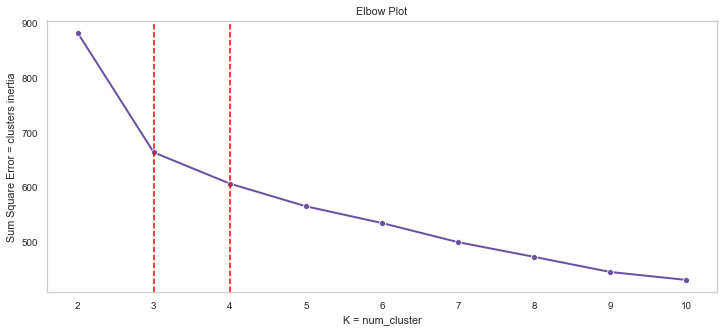

In [21]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax, linewidth=2, color='#6A51A3')
ax.set_title("Elbow Plot")
ax.set_xlabel("K = num_cluster")
ax.set_ylabel("Sum Square Error = clusters inertia")
ax.axvline(3, ls="--", c="red")
ax.axvline(4, ls="--", c="red")
plt.grid()
plt.show()



Here "elbow" is not visible properly.The cluster can be either 3 or 4.

# 3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.


Plotting Silhouette score

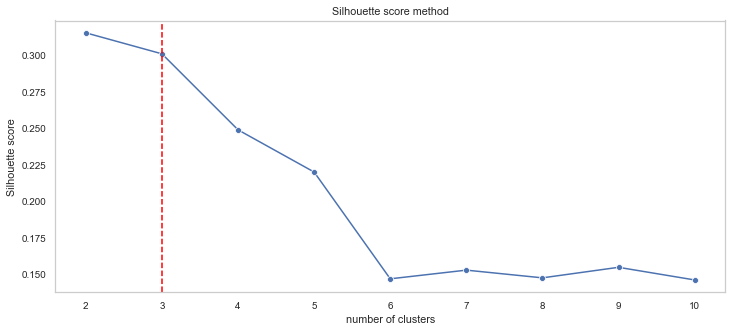

In [23]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, kmeans_sil_score, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

So here the optimal number of clusters is found to be 3

Fitting the K-Means model

In [24]:
KM_5_clusters = KMeans(n_clusters=3 , init='k-means++').fit(df2) 

KM5_clustered = df2.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ 

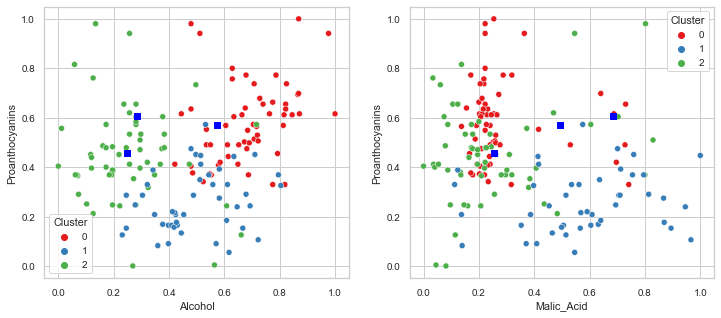

In [25]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('Alcohol', 'Proanthocyanins', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Malic_Acid', 'Proanthocyanins', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

In [26]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size = 3"]
KM_clust_sizes

,KM_size = 3
Cluster,
0,58
1,45
2,58


Agglomerative Clustering

In [27]:
df4 = df.copy()


scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df4) 
df4.loc[:,:] = scaled_values


nr_clusters = []
n_clusters = range(2, 10) 
ag_sil_score = [] 
for p in n_clusters:
    ag = AgglomerativeClustering(n_clusters=p).fit(df4)
    nr_clusters.append((len(np.unique(ag.labels_))))
    ag_sil_score.append(silhouette_score(df4, ag.labels_))
    
results = pd.DataFrame([n_clusters, nr_clusters, ag_sil_score], index=['n_clusters','clusters', 'sil_score']).T
results.sort_values(by='sil_score', ascending=False).head()

,n_clusters,clusters,sil_score
0,2.0,2.0,0.296668
1,3.0,3.0,0.294829
2,4.0,4.0,0.248703
7,9.0,9.0,0.212090
6,8.0,8.0,0.211014


Finding the optimum number of clusters in each model and create the model with the optimum number of clusters.

Plotting silhoette score

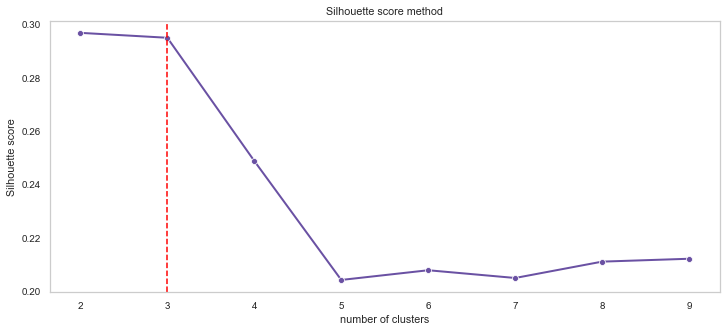

In [28]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, ag_sil_score, marker='o', ax=ax, linewidth=2, color='#6A51A3')
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

the optimum cluster number is 3

Fitting the Agglomerative Clustering  model

In [30]:
ag = AgglomerativeClustering(n_clusters=3).fit(df4)
ag_clustered = df4.copy()
ag_clustered.loc[:,'Cluster'] = ag.labels_ 
ag_clust_sizes = ag_clustered.groupby('Cluster').size().to_frame()
ag_clust_sizes.columns = ["Agglomerative Clustering size"]
ag_clust_sizes

,Agglomerative Clustering size
Cluster,
0,71
1,50
2,57


Principal Component Analysis (PCA)

In [43]:
from sklearn import preprocessing
df7 = pd.read_csv("Wine.csv")
scaler = preprocessing.StandardScaler().fit(df7)
df7 = scaler.transform(df7)

In [44]:
from sklearn.decomposition import PCA
pc = PCA() 
results = pc.fit(df7) 
Z = results.transform(df7)

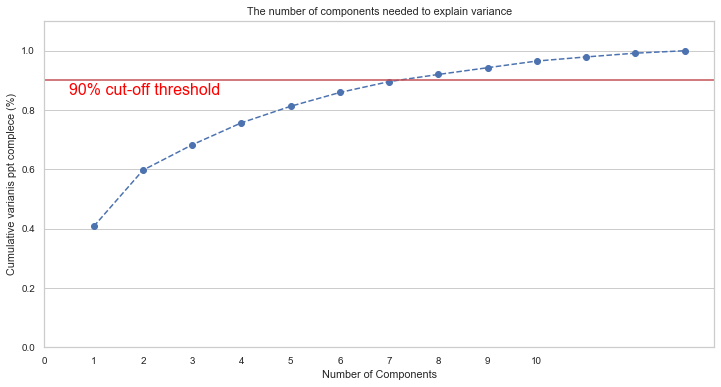

In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(df7)

pca = PCA().fit(data_rescaled)

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 14, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative varianis ppt complece (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85,'90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Above screen plot shows the variances explained by each latent variable. The 1st component explains approx. 35% of the variance in the whole dataset.
By examining the above figure, we can conclude that first 6 variables contain most of the information.

In [49]:
from sklearn.decomposition import PCA
pca_r = PCA(7)
pca_r_result = pca_r.fit_transform(data_rescaled)

In [50]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.133368,0.248516,-0.000739,0.177839,-0.088657,-0.395071,-0.414590,0.333109,-0.252902,0.092329,-0.251137,-0.473492,-0.286862
1,-0.550884,-0.227391,-0.163091,0.079776,-0.188166,-0.074145,-0.001007,-0.009960,-0.031418,-0.519707,0.237206,0.215562,-0.443888
2,-0.083848,0.492039,0.403009,0.477242,0.006551,0.253065,0.196105,0.285982,0.228342,-0.033100,-0.106589,0.297776,-0.151968
3,-0.040328,0.486032,-0.241976,-0.081694,0.015880,-0.052643,-0.027033,-0.709095,0.076574,-0.026322,-0.352498,0.082062,-0.229793
4,-0.278010,-0.412890,0.286394,0.418305,0.470899,-0.018030,0.002573,-0.360038,0.148666,0.200582,-0.077162,-0.263396,-0.076556
5,-0.137254,-0.213103,-0.300965,-0.135610,-0.312519,0.283604,0.147045,0.197232,0.503115,0.388032,-0.283041,-0.167278,-0.276349
6,-0.275352,0.310302,-0.171805,-0.297556,0.520419,-0.066524,-0.050698,0.214889,0.466207,-0.212596,0.193315,-0.224561,0.188372
7,0.555031,-0.076928,-0.123460,0.270756,-0.019937,-0.413384,-0.156461,-0.034232,0.483470,-0.036924,0.295372,0.102303,-0.260229
8,0.326687,-0.014471,-0.044362,-0.204924,0.471910,0.351232,0.088960,0.122889,-0.284054,-0.023708,0.068775,-0.060197,-0.624839
9,-0.035912,-0.237073,-0.056899,-0.132503,0.325868,-0.263006,-0.199445,0.236775,0.018743,0.039143,-0.534248,0.602194,0.023829


In [51]:


pd.DataFrame(pca_r_result[:,:6], columns=list(
[u'Alcohol', u'Malic_Acid', u'Ash', u'Ash_Alcanity', u'Magnesium', u'Total_Phenols'])).head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790
5,-0.608190,-0.487519,-0.075433,-0.184152,-0.068730,0.027011
6,-0.544047,-0.300196,-0.105075,-0.043006,-0.239967,-0.097480
7,-0.474357,-0.298197,-0.002821,-0.086235,-0.069381,-0.348479
8,-0.500432,-0.307603,-0.230494,-0.024397,-0.219723,0.059622
9,-0.627518,-0.206328,-0.114148,0.059695,-0.049682,0.089690


We have the 6 columns that contain majority of the information needed, we will apply clustering algorithm to the dataframe and see if reducing dimensionality actually happens.

Applying KMeans clustering after PCA

In [52]:

dfvar = pd.DataFrame(pca_r_result[:,:6], columns=list(
[u'Alcohol', u'Malic_Acid', u'Ash', u'Ash_Alcanity', u'Magnesium', u'Total_Phenols'])) 
KM_3_clusters = KMeans(n_clusters=3 , init='k-means++').fit(dfvar) 

KM3_clustered = dfvar.copy()
KM3_clustered.loc[:,'Cluster'] = KM_3_clusters.labels_ 

In [53]:
KM_clust_sizes = KM3_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size = 3 Size After PCA"]
KM_clust_sizes

,KM_size = 3 Size After PCA
Cluster,
0,55
1,62
2,61


Applying Agglomerative Clustering clustering after PCA

In [54]:

dfvar = pd.DataFrame(pca_r_result[:,:6], columns=list(
[u'Alcohol', u'Malic_Acid', u'Ash', u'Ash_Alcanity', u'Magnesium', u'Total_Phenols']))


no_of_clusters = []
n_clusters = range(2, 10)
ag_sil_score = [] 

for p in n_clusters:
    ag = AgglomerativeClustering(n_clusters=p).fit(dfvar)
    no_of_clusters.append((len(np.unique(ag.labels_))))
    ag_sil_score.append(silhouette_score(dfvar, ag.labels_))
    
results = pd.DataFrame([n_clusters, no_of_clusters, ag_sil_score], index=['n_clusters','clusters', 'sil_score']).T
results.sort_values(by='sil_score', ascending=False).head() # display only 5 best scores

,n_clusters,clusters,sil_score
1,3.0,3.0,0.328477
0,2.0,2.0,0.325491
2,4.0,4.0,0.279820
3,5.0,5.0,0.262047
4,6.0,6.0,0.260523


In [55]:

ag = AgglomerativeClustering(n_clusters=3).fit(dfvar)
ag_clustered = dfvar.copy()
ag_clustered.loc[:,'Cluster'] = ag.labels_ # append labels to points
ag_clust_sizes = ag_clustered.groupby('Cluster').size().to_frame()
ag_clust_sizes.columns = ["Agglomerative Clustering size after PCA"]
ag_clust_sizes

,Agglomerative Clustering size after PCA
Cluster,
0,73
1,49
2,56


So it is observed that after performing PCA the clustering is better for both kmeans and Agglomerative.